### bmp图像滤波

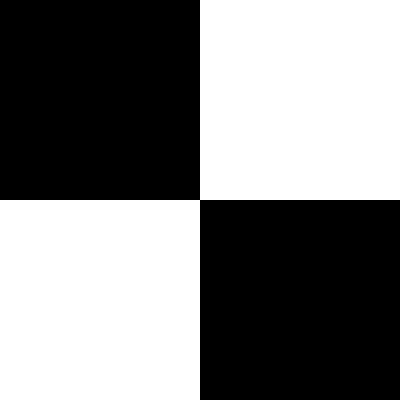

In [1]:
# 读取图像
from PIL import Image
# 读取bmp图像
img = Image.open('./pic_2.bmp')
# 显示图像
img

In [2]:
# 获取图像尺寸
width, height = img.size

# 显示图像尺寸
print("图像尺寸为：{} x {}".format(width, height))

图像尺寸为：400 x 400


In [3]:
# 获取图像像素矩阵
pixels = img.load()
# 显示像素矩阵
print(pixels[3,3])
print(pixels[399,399][0])
print(pixels[399,0][0])

(0, 0, 0)
0
255


In [4]:
import numpy as np

In [5]:
# 存储成numpy形式
image = np.empty((width, height))
for x in range(img.width):
    for y in range(img.height):
        image[y,x] = pixels[x,y][0]
image

array([[  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       [  0.,   0.,   0., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.],
       [255., 255., 255., ...,   0.,   0.,   0.]])

In [6]:
image.size

160000

In [7]:
# 假设原始矩阵为mat，p为行填充数，q为列填充数
p = 7
q = 7

# 在原始矩阵的上下和左右分别填充0
zero_fill_image = np.pad(image, ((p, p), (q, q)), 'constant', constant_values=0)
zero_fill_image

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
zero_fill_image.size

171396

In [9]:
# 定义卷积函数
def convolution(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        # 表示卷积操作的次数
        y = y - 2 * m
        x = x - 2 * n
        print(x,y)
        #创建一个新图像空间
        new_image = np.zeros((y,x))
        #开始卷积
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

# 定义卷积核
kernel = np.full((15, 15), 1/225)

# 执行卷积操作
new_image = convolution(zero_fill_image, kernel)

# 输出卷积结果
print(new_image)

384 384
[[  0.   0.   0. ... 136. 136. 136.]
 [  0.   0.   0. ... 153. 153. 153.]
 [  0.   0.   0. ... 170. 170. 170.]
 ...
 [136. 153. 170. ...   0.   0.   0.]
 [136. 153. 170. ...   0.   0.   0.]
 [136. 153. 170. ...   0.   0.   0.]]


In [10]:
new_image.size

147456

图像尺寸存在一些问题

In [11]:
import matplotlib.pyplot as plt

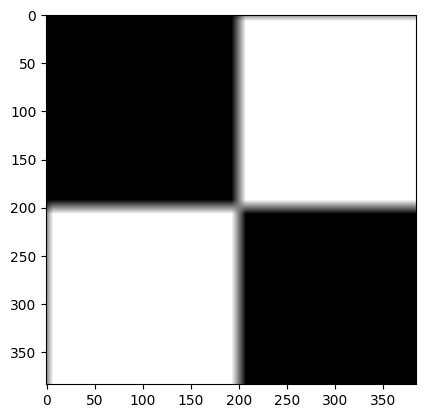

In [12]:
# 使用imshow()函数将矩阵显示为图像
plt.imshow(new_image, cmap='gray')

# 显示图像
plt.show()